# Exploratory Data Analysis (EDA) Template

### 1. Importació de Biblioteques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sweetviz as sv
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

****
### 2. Carregar el dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Nicolakorff/Projecte-Machine-Learning/refs/heads/main/datasets/bank_dataset.CSV')

****
### 3. Mostra de les primeres files del dataset

In [3]:
# Sense límits de visualització de columnes per veure-les totes a una primera vista.
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33.0,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39.0,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32.0,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43.0,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34.0,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


**Sobre el dataset**
- Age, edat.
- Job, feina.
- Marital, estat civil.
- Education, niveld d'educació.
- Default, deutes o incumpliments de pagaments.
- Balance, saldo actual al compte bancari.
- Housing, hipoteca.
- Loan, prestac.
- Contact, forma de contacte al client.
- Day, día de contacte.
- Month, mes de contacte.
- Duration, duració de la trucada en segons.
- Campaign, vegades de contacte realitzats durant aquesta campanya.
- Pdays, numero de dies des de l'ultim contacte.
- Previous, contactes previs realitzats.
- Poutcome, resultats de campanyes anteriors amb el client.
- Deposit, diposit adquirit.

****
### 4. Informació general del dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


In [6]:
# Informació més concreta de les columnes i files
print('Cuantitat de Files i columnes:',df.shape)
print('Nombre columnas:',df.columns)

Cuantitat de Files i columnes: (11162, 17)
Nombre columnas: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


 - Veiem que hi ha 16 columnes amb categoria principal 'diposit'. Algunes contenen valors numèrics i altres categòrics.

**Enumerem a continuació per separat:**

In [7]:
# Valors categórics 
cat_features = [column for column in df.columns if df[column].dtype=='O']
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [8]:
# Valors numérics
num_features = [column for column in df.columns if df[column].dtype!='O']
num_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

****
### 5. Descripció estadística del dataset

In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


****
### 6.1. Histograma de cada variable numèrica

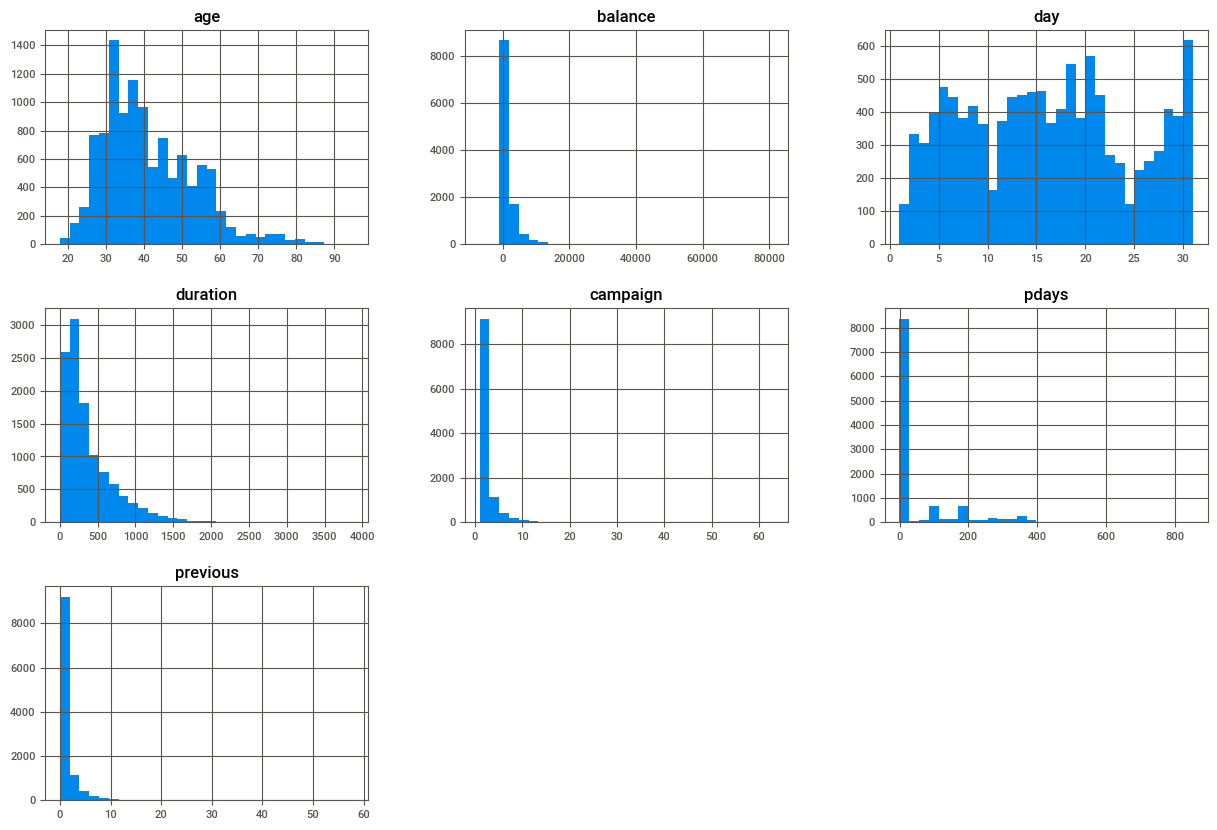

In [210]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

### 6.2.1. Visualització en columnes de cada variable categòrica

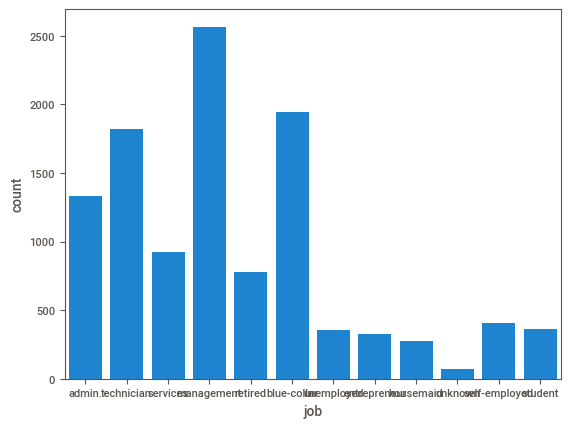

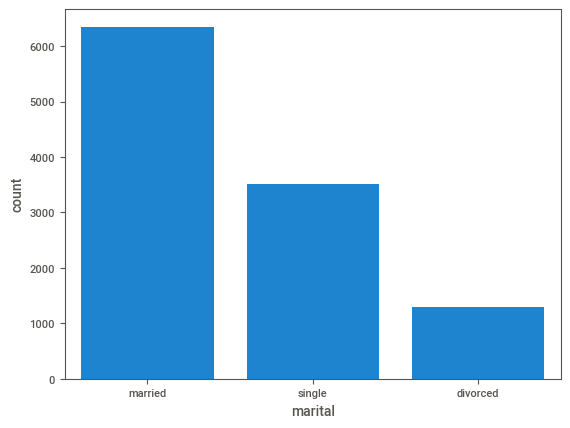

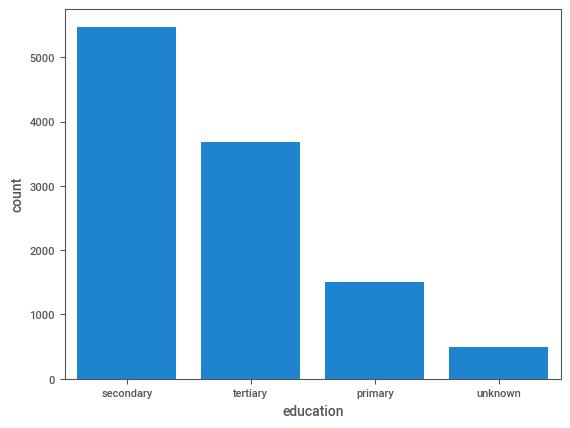

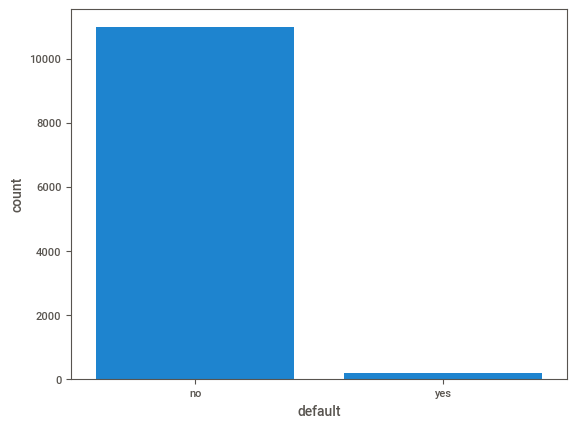

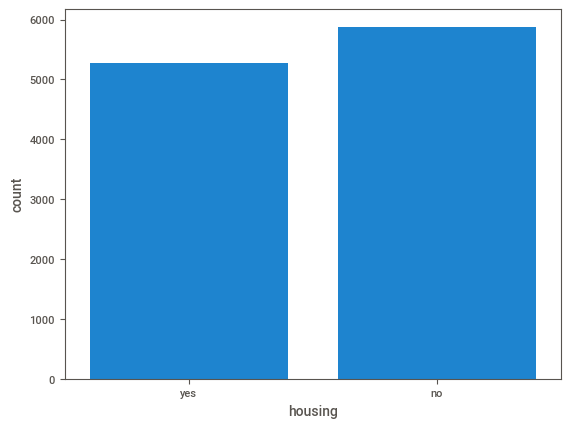

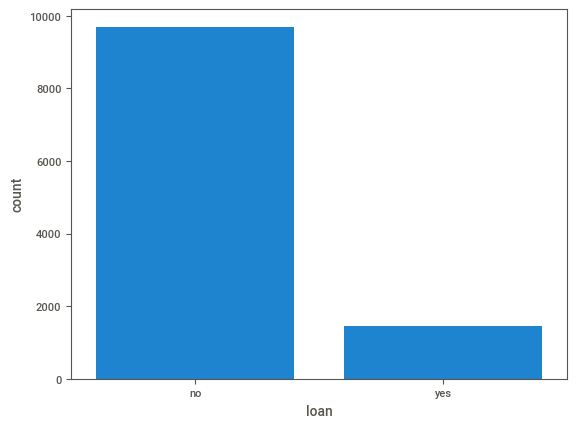

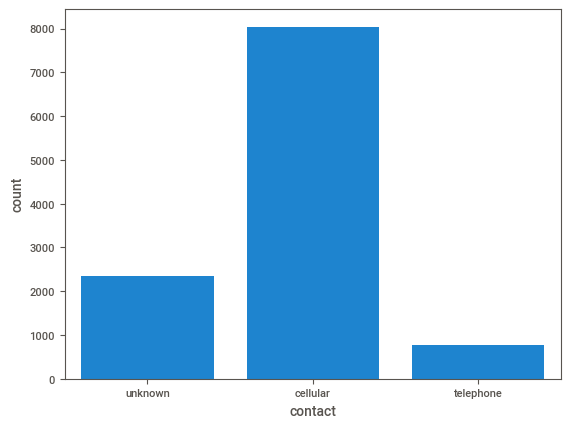

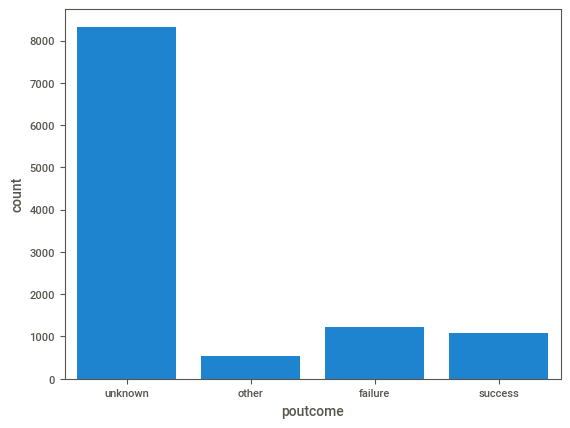

In [211]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for column in categorical_columns:
    sns.countplot(x=df[column])
    plt.show()

### 6.2.2. Comptar els valors de cada variable categòrica

In [212]:
for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64
education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64
default
no     10994
yes      168
Name: count, dtype: int64
housing
no     5881
yes    5281
Name: count, dtype: int64
loan
no     9702
yes    1460
Name: count, dtype: int64
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64
poutcome
unknown    8326
failure    1228
success    1071
other       537
Nam

****
### 7. Resum de l'observació superficial del dataset

**Descripció de les dades categòriques**
- Es pot comprovar que de les dades recol·lectades, a nivell de professions, les que més apareixen són management,blue colar i tècnics, mentre que les més baixes són les mestresses de casa.
- A nivell d'estat civil, hi ha el doble de casats que de solters i un mínim de divorciats.
- L'escolaritat es presenta amb una clara majoria d'estudis secundaris davant de menys terciaris i pocs primaris.
- De les persones consultades molt pocs tenen deutes no pagats.
- Amb poca diferència s'aprecia una diferència de més persones sense hipoteques que amb.
- Així mateix, una gran majoria no té préstecs pendents.
- La resposta telefònica ha estat majoritàriament amb gran diferència per telèfon mòbil davant del fix.
- Els resultats de campanyes anteriors són baixos, sent estranyament majoritàriament desconegut, seguit de fracàs i amb poca diferència èxit.

**Descripció de les dades numèriques**
- La majoria de les persones presenta una edat que ronda entre els 30 i els 40 anys, sent la mínima per sota de 20 i la màxima per sobre de 90 anys.
- El sou dels entrevistats és majoritàriament baix-mitjà.
- Dels dies en què es van fer les consultes i que va haver-hi resposta el que més resposta va haver-hi va ser l'últim del mes seguit dels dies que ronden el 20. Això pot ser degut a moltes causes diferents.
- La durada de les trucades és predominantment curta.
- El nombre de contactes o intents de contacte realitzats durant la campanya són, així mateix, predominantment pocs, entre 1 i 4 trucades. I sent alguna vegada fins a 12 vegades.
- L'últim dia de contacte amb els cleints és majoritàriament curt, en molt pocs casos de campanyes anteriors més d'un any.
- Finalment, el nombre de contactes previs realitzats són predominantment pocs, entre 1 i 3. Sent el màxim de 11 vegades.

****
### 8. Valors nuls

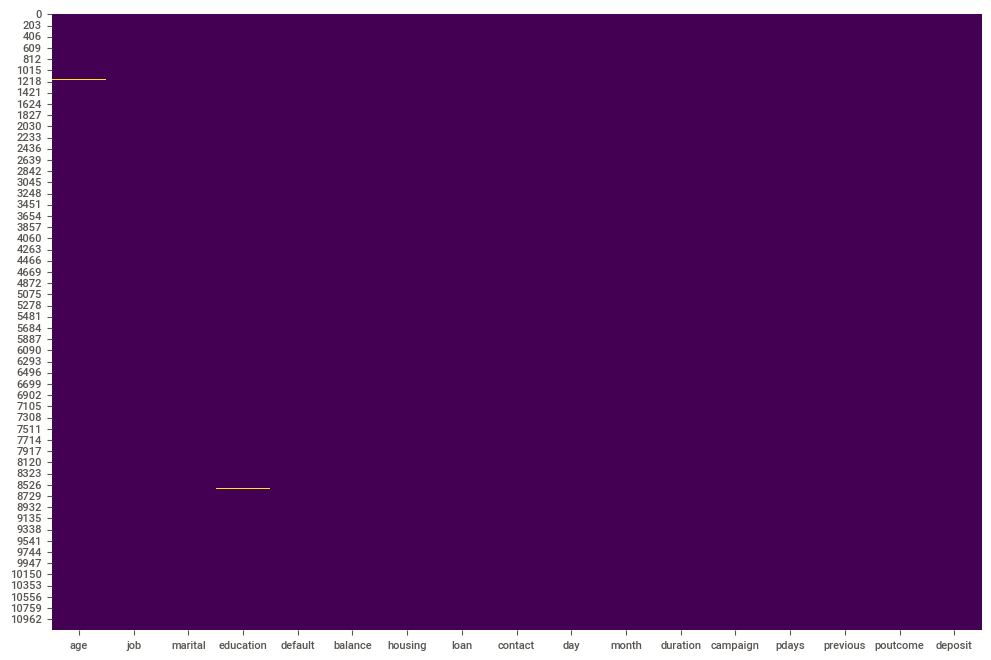

In [126]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [10]:
# Comptar valors nuls per columna
df.isnull().sum()

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

- Observem que hi tres columnes que contenen valors nuls: 'age' (numèric), 'marital' i 'education' (categèric)

### 8.1. Tractament de valors nuls

In [11]:
# Convertir els valors categòrics nuls a l'etiqueta: 'unknown' 
df['education'] = df['education'].fillna('unknown')
df['marital'] = df['marital'].fillna('unknown')
df.isnull().mean().sort_values(ascending=False)

age          0.000896
day          0.000000
poutcome     0.000000
previous     0.000000
pdays        0.000000
campaign     0.000000
duration     0.000000
month        0.000000
contact      0.000000
job          0.000000
loan         0.000000
housing      0.000000
balance      0.000000
default      0.000000
education    0.000000
marital      0.000000
deposit      0.000000
dtype: float64

In [12]:
# Convertir els valors numèrics al valor '0'
df['age'] = df['age'].fillna(0)
df.isnull().mean().sort_values(ascending=False)

age          0.0
day          0.0
poutcome     0.0
previous     0.0
pdays        0.0
campaign     0.0
duration     0.0
month        0.0
contact      0.0
job          0.0
loan         0.0
housing      0.0
balance      0.0
default      0.0
education    0.0
marital      0.0
deposit      0.0
dtype: float64

 - No resten valors nuls

****
### 9. Descubrir outliers i el seu tractament mitjançant Winsorització

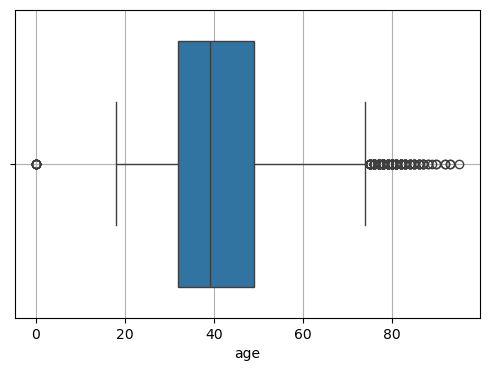

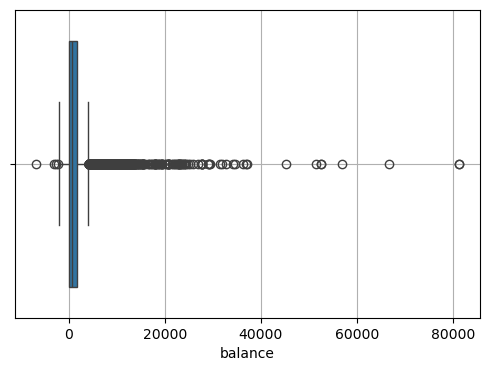

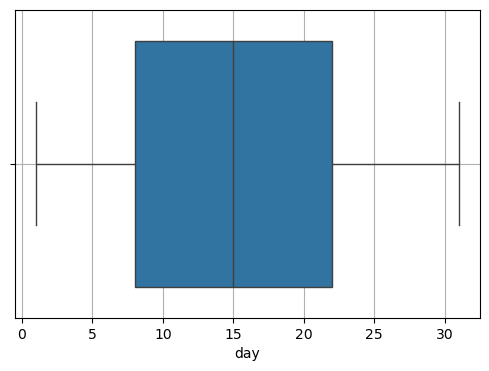

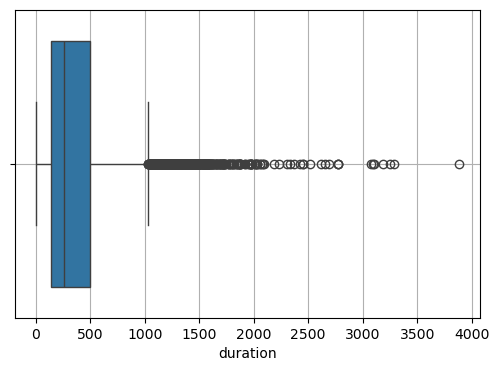

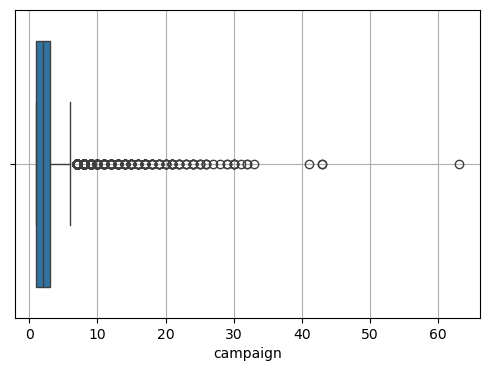

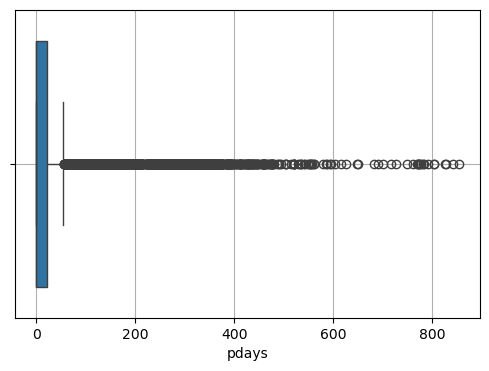

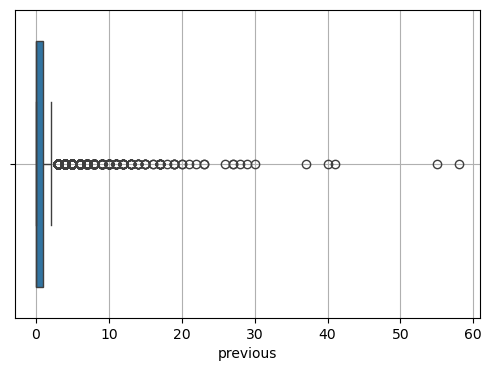

In [13]:
# Llistar columnes per detectar outliers
columns_to_check = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

df_nuls=df

# Crear diagramas de caixa per visualitzar outliers a cada columna
for column in columns_to_check:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_nuls[column])
    plt.xlabel(column)
    plt.grid(True)
    plt.show() 

- Es van detectar outliers a totes les columnes assenyalades, menys day. La que sembla tenir més és pday.

In [14]:
# Pe tractar els outliers s'aplicará la tècnica de Winsorización per mantenir l'estructura del dataset
# Funció per calcular límits IQR
def calculate_iqr_limits(df_nuls, columns):
    limits_dict = {}
    
    for column in columns:
        Q1 = df_nuls[column].quantile(0.25)
        Q3 = df_nuls[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        limits_dict[column] = (lower_bound, upper_bound)
        
    return limits_dict

In [15]:
# Funció per winsorizar dades
def winsorize_data(df_nuls, columns):
    limits_dict = calculate_iqr_limits(df_nuls, columns)
    
    for column, (lower_bound, upper_bound) in limits_dict.items():
        # Winsoritzar: Reemplaçar valors menors que'l límit inferior i majors que'l límit superior
        df_nuls[column] = np.clip(df_nuls[column], lower_bound, upper_bound)
        
    return df_nuls

In [16]:
# Definir les columnes a winsoritzar
columns_to_check = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
# Aplicar winsorització a les columnes especificades
df_wins = winsorize_data(df_nuls, columns_to_check)
# Guardar el DataFrame en un archivo CSV
df_wins.to_csv('bank_dataset_wins.csv', index=False)

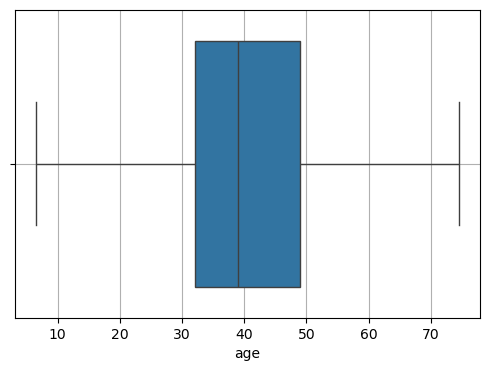

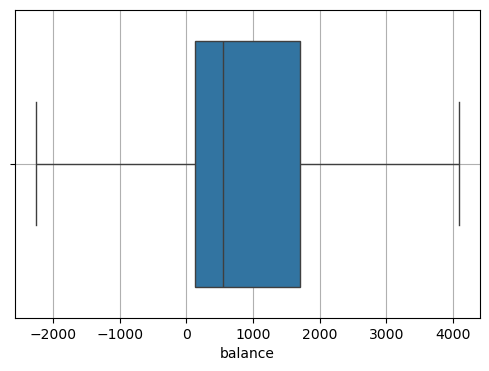

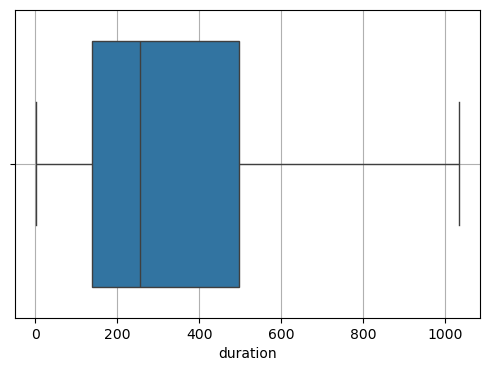

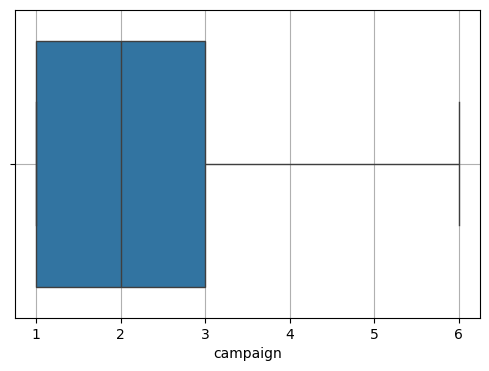

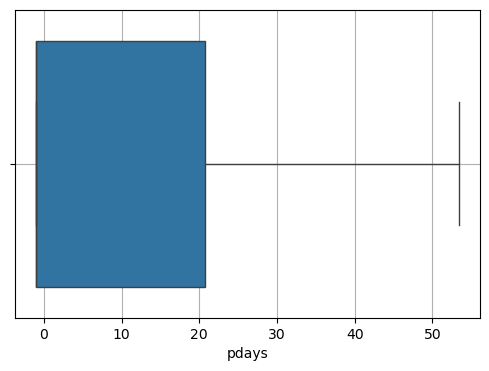

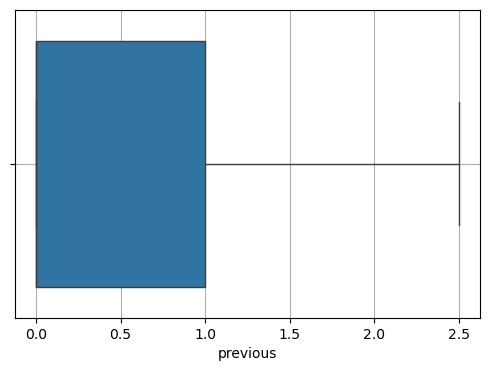

In [17]:
# Comprobem que no hi hagi outliers
for column in columns_to_check:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_nuls[column])
    plt.xlabel(column)
    plt.grid(True)
    plt.show() # No es detecten outliers

****
### 10. Verificar distribució de la variable objectiu 'deposit'

- Veure si hi ha desbalance de classe:

In [18]:
print(df_wins['deposit'].value_counts(normalize=True) * 100)

deposit
no     52.616019
yes    47.383981
Name: proportion, dtype: float64


- Negatiu

****
### 11. Matriu de Correlació

**Seleccio de caracterísitques rellevants aplicant métode de filtratge**

In [19]:
# Convertir 'deposit' en valors numérics
df_wins['deposit'] = df_wins['deposit'].map({'yes': 1, 'no': 0})

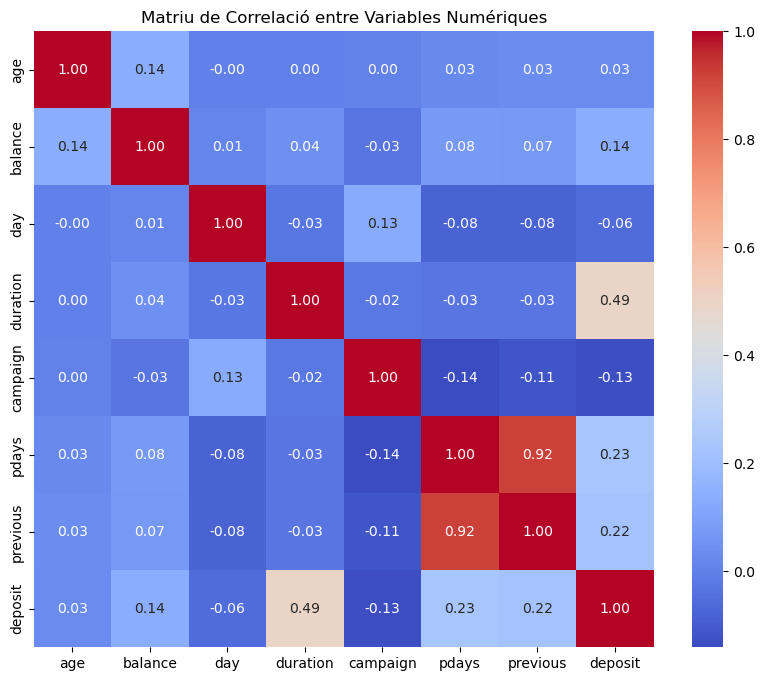

In [20]:
# Seleccionar només les columnes numéricas
numeric_df = df_wins.select_dtypes(include=['float64', 'int64'])

# Calcular la matriu de correlació
correlation_matrix = numeric_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriu de Correlació entre Variables Numériques")
plt.show()

**Comentaris**
- Es pot comprovar al mapa la correlació entre els diferents valors numèrics:
- Hi ha una correlació lineal positiva forta entre duration y deposit, la variable objectiu.
- Hi ha una correlació lineal positiva feble entre la variable objectiu deposit i les variables duration, pydays i balance.
- Hi ha una correlació lineal positiva molt forta entre pdays i previous.
- Hi ha una correlació lineal positiva feble entre age i balance.
- Hi ha una correlació lineal positiva feble entre day i campaign.
- Hi ha una correlació lineal negativa feble entre previous i pdays amb campaign.
- Hi ha una correlació lineal negativa feble entre les variables deposit i campaign.
- S'hi observa una relació important entre edat i saldo al banc. Així com entre el dia que es van fer les trucades amb els potencials clients i les campanyes realitzades. També amb la durada de les trucades i l'adquisició de deposit. Així com una relació negativa entre deposit i campanyes.

### 12. Proba de Chi-Cuadrado

In [21]:
# Seleccionar només les columnes categóriques
categorical_df = df_wins.select_dtypes(include=['object'])

In [36]:
# Aplicar la proba de Chi-cuadrado per cada variable categórica davant de 'deposit'
for column in categorical_df.columns:
    contingency_table = pd.crosstab(df_wins['deposit'], df_wins[column])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Variable: {column}")
    print(f"Chi2: {chi2}, p-valor: {p}")
    if p < 0.05:
        print("Relació significativa amb 'deposit' (p < 0.05)")
    else:
        print("No hi ha relació significativa (p >= 0.05)")
    print("-" * 40)

Variable: job
Chi2: 378.0752558664989, p-valor: 2.741689587081072e-74
Relació significativa amb 'deposit' (p < 0.05)
----------------------------------------
Variable: marital
Chi2: 109.28002543010822, p-valor: 1.5677449862744508e-23
Relació significativa amb 'deposit' (p < 0.05)
----------------------------------------
Variable: education
Chi2: 122.81819633935214, p-valor: 1.9073606325890222e-26
Relació significativa amb 'deposit' (p < 0.05)
----------------------------------------
Variable: default
Chi2: 17.808573693473097, p-valor: 2.442800179192829e-05
Relació significativa amb 'deposit' (p < 0.05)
----------------------------------------
Variable: housing
Chi2: 463.1892407533161, p-valor: 9.724394114495535e-103
Relació significativa amb 'deposit' (p < 0.05)
----------------------------------------
Variable: loan
Chi2: 135.83217051738103, p-valor: 2.171286879630289e-31
Relació significativa amb 'deposit' (p < 0.05)
----------------------------------------
Variable: contact
Chi2: 73

**Comentaris**
- Podem comprovar que totes las variables categóriques están relacionades amb la variable objectiu deposit, especificament les relacionades amb les campanyes de màrqueting.

In [24]:
# Dividir el dataset en dos grups segons el valor de 'deposit'
grup_0 = df_wins[df_wins['deposit'] == 0]  # Clients que no van contratar el depósit
grup_1 = df_wins[df_wins['deposit'] == 1]  # Clients que van contratar el depósit

In [38]:
# Aplicar proba t per a cada variable numérica
for column in numeric_df.columns:
    t_stat, p_value = ttest_ind(grup_0[column], grup_1[column], nan_policy='omit')
    
    print(f"Variable: {column}")
    print(f"T-Statistic: {t_stat}, p-valor: {p_value}")
    if p_value < 0.05:
        print("Diferencia significativa en mitges entre grups (p < 0.05)")
    else:
        print("No ha ha diferencia significativa en mitges entre grups (p >= 0.05)")
    print("-" * 40)

Variable: age
T-Statistic: -3.3844264648431928, p-valor: 0.0007157270723635557
Diferencia significativa en mitges entre grups (p < 0.05)
----------------------------------------
Variable: balance
T-Statistic: -14.711679421624538, p-valor: 1.5432610466975973e-48
Diferencia significativa en mitges entre grups (p < 0.05)
----------------------------------------
Variable: day
T-Statistic: 5.959773914840384, p-valor: 2.602202903938695e-09
Diferencia significativa en mitges entre grups (p < 0.05)
----------------------------------------
Variable: duration
T-Statistic: -59.7511949632253, p-valor: 0.0
Diferencia significativa en mitges entre grups (p < 0.05)
----------------------------------------
Variable: campaign
T-Statistic: 14.359506342560518, p-valor: 2.4017552094062256e-46
Diferencia significativa en mitges entre grups (p < 0.05)
----------------------------------------
Variable: pdays
T-Statistic: -25.147682881375637, p-valor: 8.657890559353853e-136
Diferencia significativa en mitges 

**Comentaris**
- Observem també dque totes les mitges presenten una diferencia significativa entre grups.

****
### 12. Anàlisis específics

### 12.1. Edats per feines

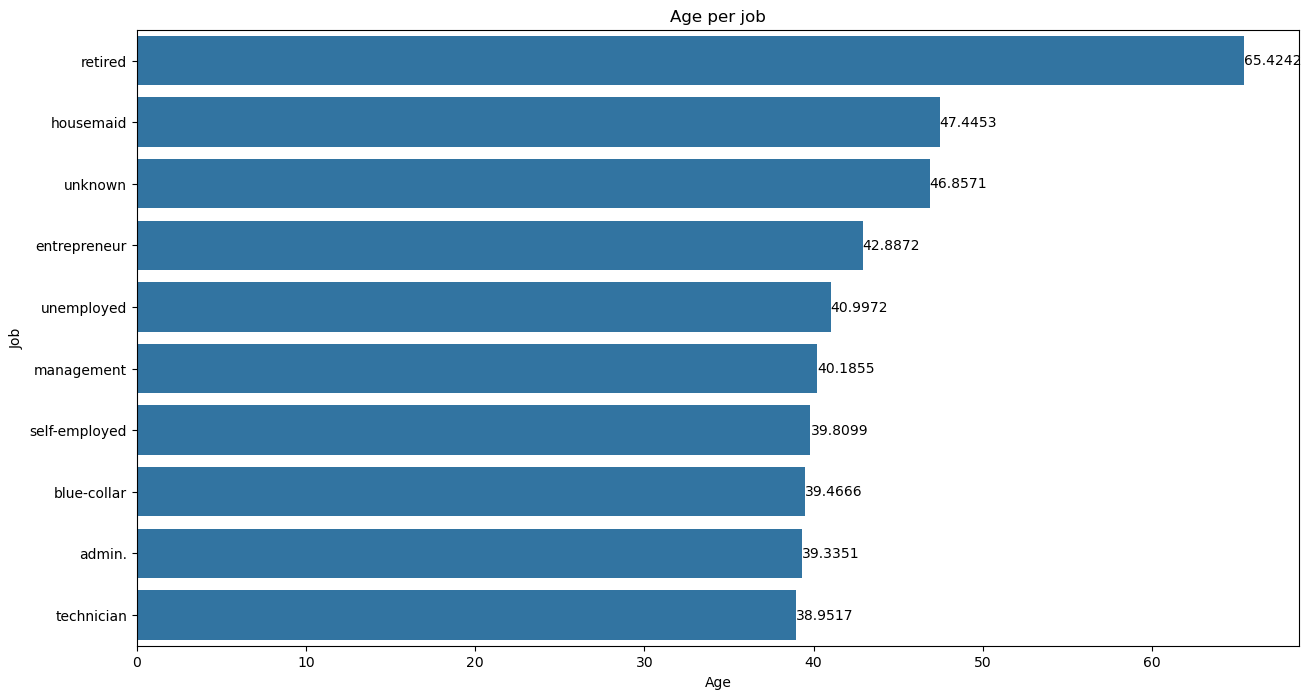

In [91]:
%matplotlib inline
plt.figure(figsize=(15,8))

ax = sns.barplot(data=df_wins.groupby('job')['age'].mean().nlargest(10).reset_index(),
                 x='age',
                 y = 'job')

ax.set(xlabel='Age', ylabel='Job', title = 'Age per job')
plt.bar_label(ax.containers[0], size=10)
plt.tight_layout
plt.show()

In [92]:
df_wins.groupby('job')['age'].mean().nlargest(10).reset_index()

,job,age
0,retired,65.424165
1,housemaid,47.445255
2,unknown,46.857143
3,entrepreneur,42.887195
4,unemployed,40.997199
5,management,40.185503
6,self-employed,39.809877
7,blue-collar,39.466564
8,admin.,39.335082
9,technician,38.951728


- Es pot apreciar que l'edat determina la professió. Evidentment, jubilats son d'edats més avançades, la segona posició es per dones de casa, seguit de desconeguts, autònoms i persones sense feina.

### 12.2. Saldo per tipus de feines

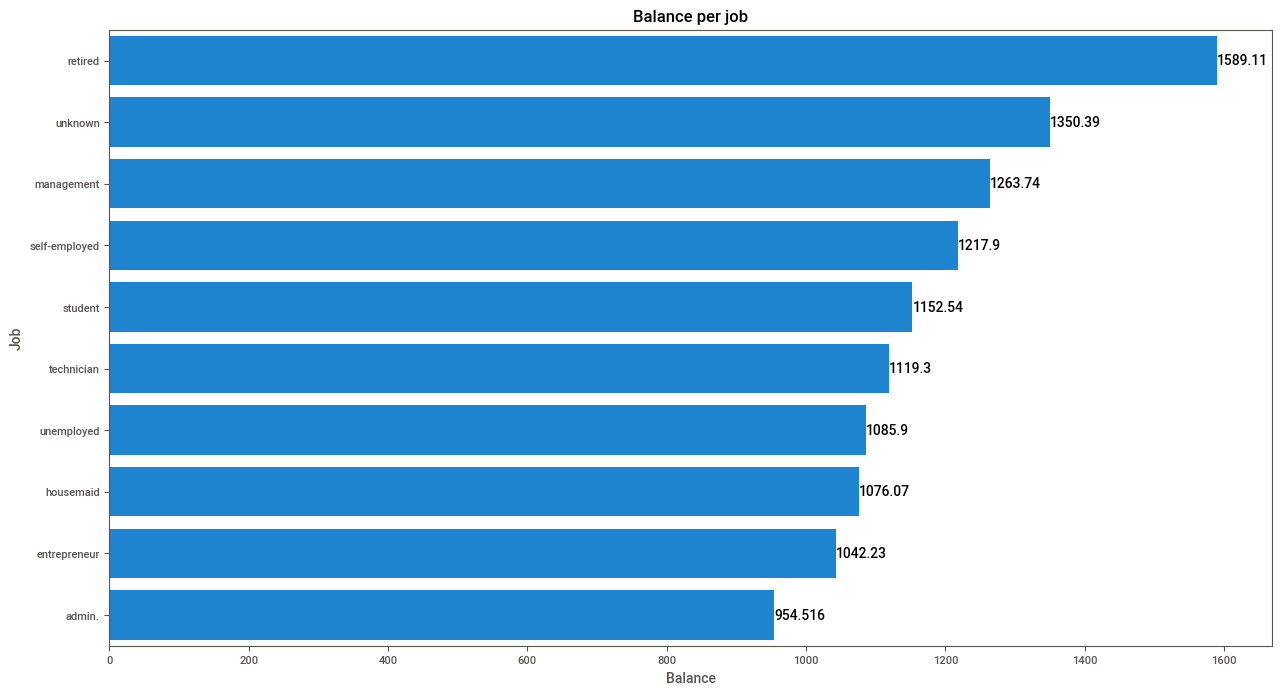

In [45]:
%matplotlib inline
plt.figure(figsize=(15,8))

ax = sns.barplot(data=df_wins.groupby('job')['balance'].mean().nlargest(10).reset_index(),
                 x='balance',
                 y = 'job')

ax.set(xlabel='Balance', ylabel='Job', title = 'Balance per job')
plt.bar_label(ax.containers[0], size=10)
plt.tight_layout
plt.show()

In [46]:
df_wins.groupby('job')['balance'].mean().nlargest(10).reset_index()

,job,balance
0,retired,1589.105398
1,unknown,1350.385714
2,management,1263.736555
3,self-employed,1217.898765
4,student,1152.536111
5,technician,1119.298409
6,unemployed,1085.899160
7,housemaid,1076.072993
8,entrepreneur,1042.231707
9,admin.,954.515742


- Es pot veure clarament la relació del saldo al compte bancari amb la feina del client. Les persones jubilades tenen el més alt, seguits per una feina que es deconeguda i molt seguit per autònoms i gestió o direcció. Relacionat també amb l'edat.

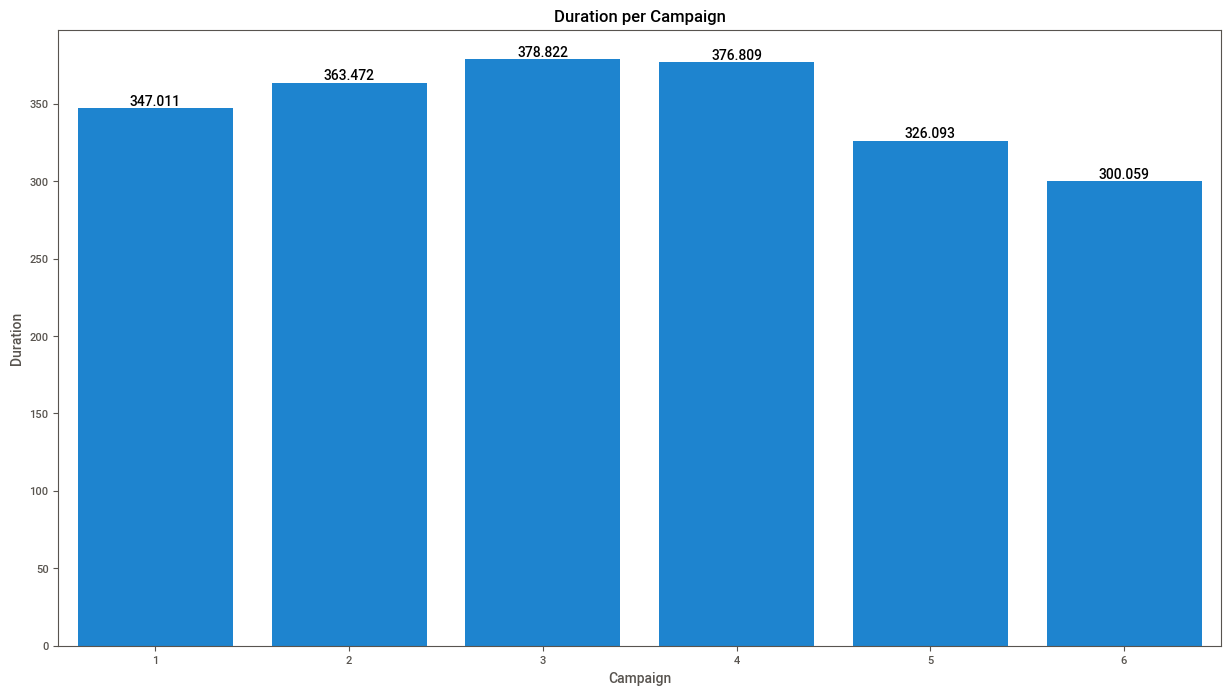

In [52]:
%matplotlib inline
plt.figure(figsize=(15,8))

ax = sns.barplot(data=df_wins.groupby('campaign')['duration'].mean().nlargest(10).reset_index(),
                 x = 'campaign',
                 y = 'duration')

ax.set(xlabel='Campaign', ylabel='Duration', title = 'Duration per Campaign')
plt.bar_label(ax.containers[0], size=10)
plt.tight_layout
plt.show()

In [51]:
df_wins.groupby('duration')['campaign'].mean().nlargest(10).reset_index()

,duration,campaign
0,822,6.000000
1,950,6.000000
2,1009,6.000000
3,1011,6.000000
4,1031,6.000000
5,647,5.333333
6,13,5.066667
7,573,5.000000
8,802,5.000000
9,991,5.000000


### 12.3. Quines edats amb quines feines tenen diposits y quines no

In [47]:
df_wins['deposit'].unique()

array([1, 0])

In [70]:
deposits = [1, 0]

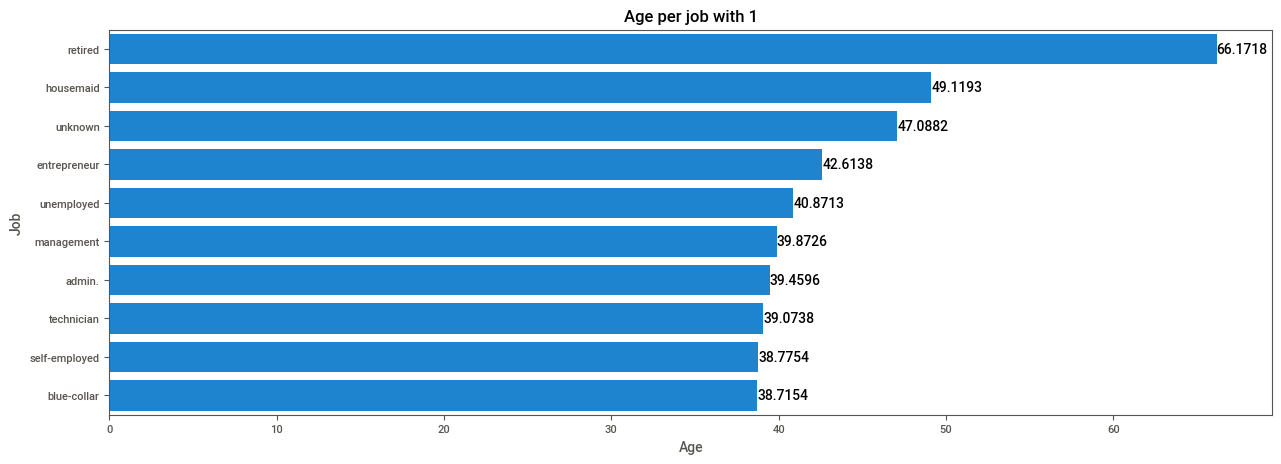

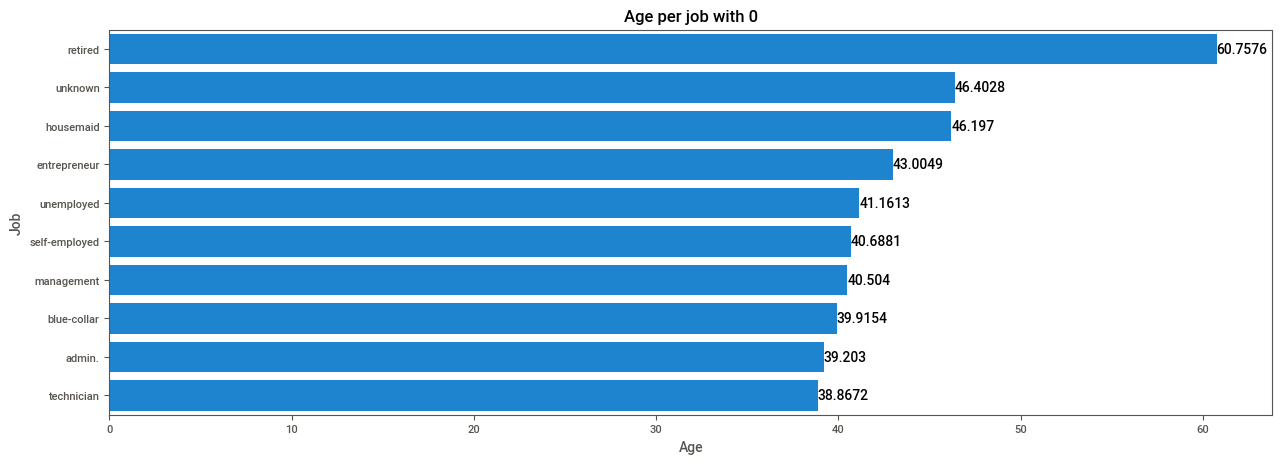

In [71]:
for deposit in deposits:
    
    plt.figure(figsize=(15,5))
    ax = sns.barplot(
                    x = df_wins[df_wins['deposit']==deposit].groupby('job')['age'].mean().nlargest(10).values,
                    y = df_wins[df_wins['deposit']==deposit].groupby('job')['age'].mean().nlargest(10).index
    )
    ax.set(xlabel='Age', ylabel='Job', title = f'Age per job with {deposit}')
    plt.bar_label(ax.containers[0], size=10)
    plt.tight_layout
    plt.show()

- S'observa que els jubilats, els autònoms i els directors o gerents son el clients que més adquireixen dipòsits.

### 12.4. Diferencia de diposit entre casats i solters

In [57]:
df_wins['marital'].value_counts()

marital
married     6349
single      3517
divorced    1291
unknown        5
Name: count, dtype: int64

In [58]:
df_wins = df_wins[df_wins['marital']!='unknown']
df_wins['marital'].value_counts()

marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64

<Axes: xlabel='marital', ylabel='age'>

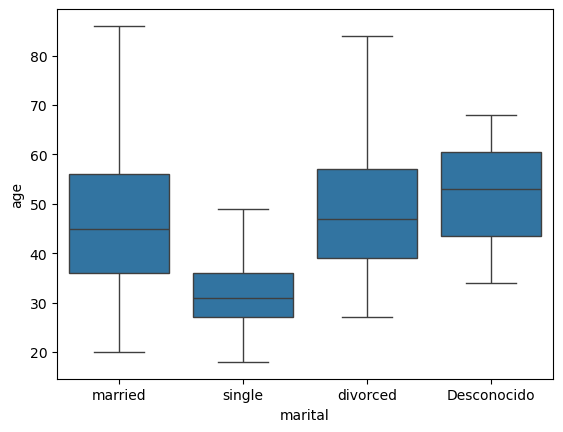

In [100]:
uno_df = df_wins[df_wins['deposit']=='yes']

sns.boxplot(data=uno_df,
           x='marital',
           y='age',
           showfliers=False)

- Es pot observar que les persones casades han comprat més diposit seguits per persones divorciades i úlims solters. Els solters son la franja d'edat més jove. 

****
### 13. EDA automàtic amb Sweetviz

In [39]:
report = sv.analyze(df_wins)
report.show_html('EDA_report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


****
### 14. Conclusions

- En analitzar la base de dades s'han pogut diferenciar els descriptius bàsics i separar-ne les característiques rellevants: són 'age', 'balance', 'day', 'campaign' segons el mapa de correlacions. Afegiria les categories 'job', 'education' i 'marital' a nivell categòric. S'han detectat i corregit els valors nuls i els outliers.
- La variant objectiu 'deposit' no està desbalancejada.
- S'ha pogut observar que la gent jove té més tendència a estar soltera, tots dos casos porten a menys adquisicions de dipòsits. Però això pot ser perquè s'ha contactat amb més gent casada que soltera o divorciada.
- D'altra banda, les professions relacionades amb les edats mantenen una relació equitativa en l'adquisició de dipòsits, sent les persones retirades de gent gran, els autònoms i els gerents o directors d'edat més avançada els targets més positius.
- La majoria de persones enquestades tenen estudis de secundària.
- Les persones tenen, en general, menys propietats immobiliàries, però amb una diferència mínima.
- Així mateix, la majoria d'enquestats no tenen crèdits bancaris ni deutes pendents.
- També es pot comprovar que com més gran és el saldo, més possibilitats hi ha que s'adquireixin dipòsits.
- La campanya té més resposta durant el mes de maig amb diferència sobre la resta.
- L'outcome és en general més negatiu que positiu, encara que hi ha molts valors desconeguts, cosa que requeriria dades més correctes per a la propera campanya.
- La majoria de contactes aconseguits han estat per via telèfon mòbil.

****